# **Case Study for statistical Methods**

In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as ols
import statsmodels.multivariate.manova as MANOVA

# Chi-Squared Test

Assume the expected distribution is 50% vegetarian and 50% non-vegetarian. You want to test if your sample data matches the distribution.

Goodness of fit.

In [12]:
import numpy as np
from scipy.stats import chisquare

# Hypothetical obseved frequencies
observed_frequency = np.array([30,70]) # 30% vegetarian, 70% non-vegetarian meals

# Expected frequencies (assuming 50-50 distribution)
total_meal = observed_frequency.sum()
expected_frequency = np.array([total_meal*0.5,total_meal*0.5])

# Perform chi-square test
chi_square_stat, p_value = chisquare(observed_frequency, f_exp = expected_frequency)

# output print
print('Chi-square statistic:',chi_square_stat)
print('P value:',p_value)

# print result with if else condition
if p_value < 0.05:
    print('Reject null hypothesis, there is significant difference between groups')
else:
    print('Fail to reject null hypothesis, there is no significant difference between groups')
    



Chi-square statistic: 16.0
P value: 6.334248366623988e-05
Reject null hypothesis, there is significant difference between groups


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

# load tips dataset from seaborn
tips = sns.load_dataset('tips')
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
# create a contingency table
contigency_table = pd.crosstab(tips['sex'], tips['smoker'])
contigency_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [15]:
# perfrom chi-square test
chi2, p, dof, expected = chi2_contingency(contigency_table)

# print outputs
print('Chi-square statistic:',chi2)
print('P value:',p)
print('Degree of freedom:',dof)
print('Expected frequencies:\n',expected)

# print result with if else condition
if p < 0.05:
    print('Reject null hypothesis, there is significant difference between groups')
else:
    print('Fail to reject null hypothesis, there is no significant difference between groups')

Chi-square statistic: 0.0
P value: 1.0
Degree of freedom: 1
Expected frequencies:
 [[59.84016393 97.15983607]
 [33.15983607 53.84016393]]
Fail to reject null hypothesis, there is no significant difference between groups


In [16]:
# contingency table based on sex and time
contigency_table = pd.crosstab(tips['sex'], tips['time'])
print(contigency_table)
# perfrom chi-square test
chi2, p, dof, expected = chi2_contingency(contigency_table)

# print outputs
print('Chi-square statistic:',chi2)
print('P value:',p)
print('Degree of freedom:',dof)
print('Expected frequencies:\n',expected)

# print result with if else condition
if p < 0.05:
    print('Reject null hypothesis, there is significant difference between groups')
else:
    print('Fail to reject null hypothesis, there is no significant difference between groups')

time    Lunch  Dinner
sex                  
Male       33     124
Female     35      52
Chi-square statistic: 9.343808982970623
P value: 0.002237400118075248
Degree of freedom: 1
Expected frequencies:
 [[ 43.75409836 113.24590164]
 [ 24.24590164  62.75409836]]
Reject null hypothesis, there is significant difference between groups


---
# T-Test

## 1. One sample t-test


In [50]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# load dataset from seaborn
df = sns.load_dataset('tips')
df.head()



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='Count'>

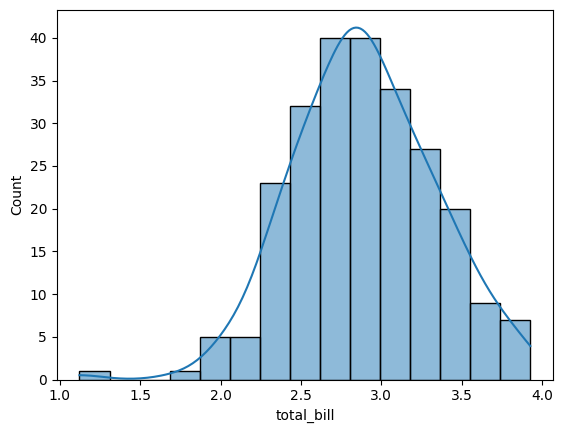

In [55]:
sns.histplot(df['total_bill'], kde=True)

In [53]:
# make total bill column as normal distribution
df['total_bill'] = np.log(df['total_bill'])


In [54]:
# Shapiro-Wilk test to see the normal distribution of data

# perform Shapiro-Wilk test
stat,p = stats.shapiro(df['total_bill'])

# print outputs
print('Statistic:',stat)
print('P value:',p)

# print result with if else condition
if p < 0.05:
    print('Reject null hypothesis, data is not normally distributed')
else:
    print('Fail to reject null hypothesis, data is normally distributed')

Statistic: 0.9913215049984732
P value: 0.15758444159434593
Fail to reject null hypothesis, data is normally distributed


mu = 3.0

is there any difference between total_bill of people and mu?

In [63]:
# performing t-test
statistics,p_value = stats.ttest_1samp(df["total_bill"],3)

# print outputs
print('Statistics:',statistics)
print('P value:',p_value)

# print result with if else condition
if p_value < 0.05:
    print('Reject null hypothesis, there is significant difference between groups')
else:
    print('Fail to reject null hypothesis, there is no significant difference between groups')

Statistics: -3.9040848724072736
P value: 0.00012257021386444337
Reject null hypothesis, there is significant difference between groups


In [60]:
df['total_bill'].mean()

np.float64(2.8903102613751135)

## 2. Two-sample independent t-test

In [67]:
print(df.head())

male_bill = df[df['sex']=='Male']['total_bill']
female_bill = df[df['sex']=='Female']['total_bill']

# perform t-test
statistics,p_value = stats.ttest_ind(male_bill,female_bill)

# print outputs
print('Statistics:',statistics)
print('P value:',p_value)

# print result with if else condition
if p_value < 0.05:
    print(f'Reject null hypothesis, because p value : {p_value}, there is significant difference between male total bill and female total bill')
else:
    print(f'Fail to reject null hypothesis,because p value : {p_value}, there is no significant difference between male total bill and female total bill')



   total_bill   tip     sex smoker  day    time  size
0    2.832625  1.01  Female     No  Sun  Dinner     2
1    2.336020  1.66    Male     No  Sun  Dinner     3
2    3.044999  3.50    Male     No  Sun  Dinner     3
3    3.164631  3.31    Male     No  Sun  Dinner     2
4    3.202340  3.61  Female     No  Sun  Dinner     4
Statistics: 2.4177325610509306
P value: 0.016357303209054097
Reject null hypothesis, because p value : 0.016357303209054097, there is significant difference between male total bill and female total bill


---
# ANOVA

In [68]:
df = sns.load_dataset('titanic')
print(df.head())
print(df.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

## Is there a difference between ages of first, second, third class passengers?

H0: there is no difference

H1: There is difference

In [71]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA test for age and class
model = ols('age ~ C(pclass)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# print result with if else condition
if anova_table['PR(>F)'][0] < 0.05:
    print('Reject null hypothesis, there is significant difference between groups')
else:
    print('Fail to reject null hypothesis, there is no significant difference between groups')

                  sum_sq     df          F        PR(>F)
C(pclass)   20929.627754    2.0  57.443484  7.487984e-24
Residual   129527.008190  711.0        NaN           NaN
Reject null hypothesis, there is significant difference between groups


C:\Users\Sumit Sharma\AppData\Local\Temp\ipykernel_2860\2630220986.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


## PostHoc Test

In [72]:
# Tukey HSD test pairwise comparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform Tukey HSD test
m_comp = pairwise_tukeyhsd(endog=df['age'], groups=df['pclass'], alpha=0.05)
print(m_comp)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper reject
-----------------------------------------------
     1      2      nan   nan   nan   nan  False
     1      3      nan   nan   nan   nan  False
     2      3      nan   nan   nan   nan  False
-----------------------------------------------


<Axes: xlabel='pclass', ylabel='age'>

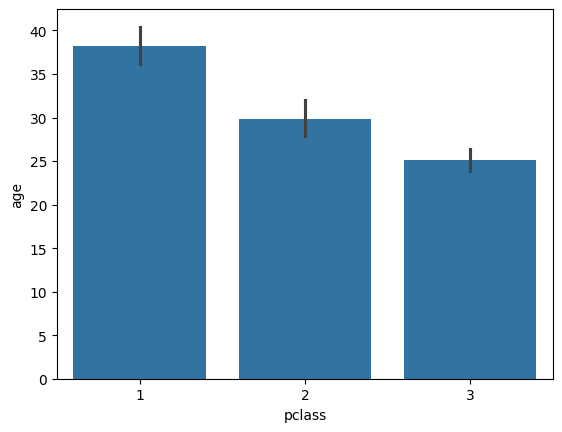

In [74]:
# draw barplot for age and class
sns.barplot(x='pclass',y='age',data=df)


<Axes: xlabel='age', ylabel='Count'>

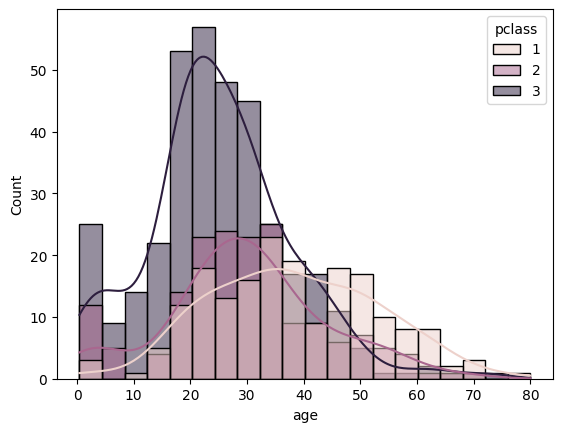

In [75]:
sns.histplot(df,x='age',hue='pclass',kde=True)

## two-way ANOVA

In [76]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA test for age and class
model = ols('age ~ C(pclass) * C(who)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                        sum_sq     df           F        PR(>F)
C(pclass)         12631.711794    2.0   52.658380  4.851088e-22
C(who)            43014.996933    2.0  179.318535  1.101456e-63
C(pclass):C(who)   1954.180055    4.0    4.073239  2.849182e-03
Residual          84557.831203  705.0         NaN           NaN


In [79]:
# Tukey HSD test pairwise comparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform Tukey HSD test
m_comp = pairwise_tukeyhsd(df['age'], df['pclass'] * df['who'], alpha=0.05)
print(m_comp)


       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
     group1          group2     meandiff p-adj lower upper reject
-----------------------------------------------------------------
          child      childchild  -3.2763   nan   nan   nan  False
          child childchildchild  -1.0024   nan   nan   nan  False
          child             man      nan   nan   nan   nan  False
          child          manman      nan   nan   nan   nan  False
          child       manmanman      nan   nan   nan   nan  False
          child           woman      nan   nan   nan   nan  False
          child      womanwoman      nan   nan   nan   nan  False
          child womanwomanwoman      nan   nan   nan   nan  False
     childchild childchildchild   2.2739   nan   nan   nan  False
     childchild             man      nan   nan   nan   nan  False
     childchild          manman      nan   nan   nan   nan  False
     childchild       manmanman      nan   nan   nan   nan  False
     child

<Axes: xlabel='who', ylabel='age'>

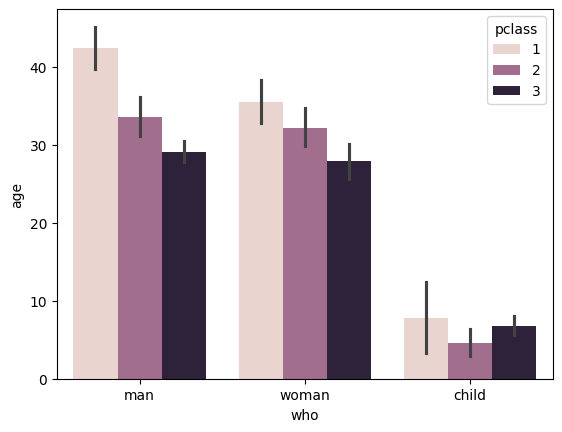

In [80]:
# barplot for age and who
sns.barplot(x='who',y='age',hue='pclass',data=df)

---
# Correlation

<Axes: >

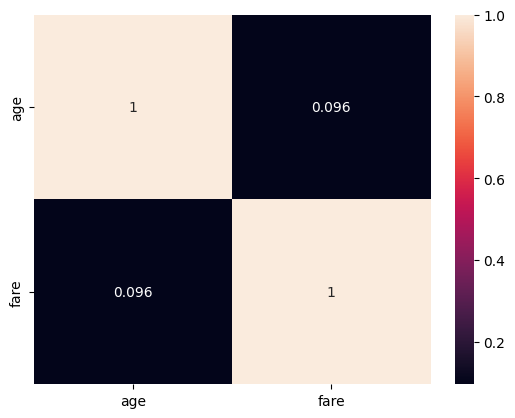

In [81]:
sns.heatmap(df[['age','fare']].corr(),annot=True)